In [71]:
import numpy as np
from matplotlib import pyplot as plt
from sto_density import *
from scipy.fftpack import fft 
from tqdm import tqdm

In [94]:
kappa = 1
n = 6
tau = 22.5
epsilon = 5
mu = 1.2
nu = 1.2

T = 5e3
dt = 1e-2
sigma = 1e-3
n_batches = int(T)

N = 40

epsilons = np.linspace(2, 10, N)
taus = np.linspace(10, 30, N)
freqs = np.empty((N, N))
amps = np.empty((N, N))



for (i, epsilon) in tqdm(enumerate(epsilons)): 
    for (j, tau) in enumerate(taus):
        m = density_field_model(mu, nu, kappa, n, tau, epsilon)
        m.initialise(T, dt, n_batches, 1.2, sigma)
        m.evolve() 
        
        y = np.copy(m.psi[-200:]).flatten() 
        y_k = np.abs(np.fft.rfft(y)[1:])
        
        freqs[i, j] = y_k.argmax()
        amps[i, j] = y_k.max() 

40it [48:02, 72.07s/it]


In [106]:
np.save('freqs.npy', freqs)
np.save('amps.npy', amps)

In [107]:
freqs = np.load('freqs.npy')
amps = np.load('amps.npy')

0.2007722007722008 1.2682926829268293


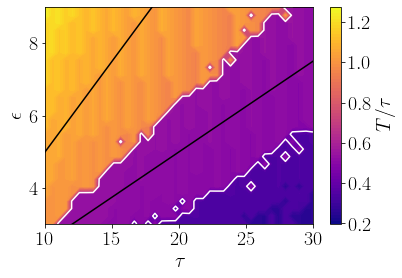

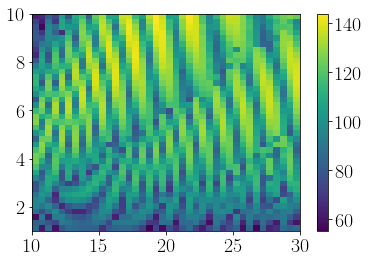

In [145]:
image = (200/(freqs+1)/taus[np.newaxis, :])[1:-1, :]
vmin = np.amin(image)
vmax = np.amax(image)
print(vmin, vmax)

plt.rc('font', size=20)
plt.rc('text', usetex=True)

plt.contourf(taus, epsilons[1:-1], image, vmin=vmin, vmax=vmax, cmap='plasma', levels=100)
plt.colorbar(ticks=[0.2, 0.4, 0.6, 0.8, 1, 1.2], label=r'$T/\tau$') 
plt.contour(taus, epsilons[1:-1], image, levels=[0.4, 0.6], colors='white')
plt.plot(taus, taus*0.25, color='k')
plt.plot(taus, taus*0.5, color='k')
plt.xlim([10, 30])
plt.ylim([3, 9])
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\epsilon$')
plt.tight_layout()
plt.savefig()
plt.show() 

plt.imshow(amps[1:, :], extent=[10, 30, 1, 10], aspect='auto', origin='lower')
plt.colorbar() 
plt.show() 

In [39]:
print(taus)
print(epsilons)

tau = 22.5
epsilon = 5
sigma =1e-3
T = 1e4
dt = 1e-2
m = density_field_model(mu, nu, kappa, n, tau, epsilon)
m.initialise(T, dt, n_batches, 1.2, sigma)
m.evolve(True) 

[10.         11.05263158 12.10526316 13.15789474 14.21052632 15.26315789
 16.31578947 17.36842105 18.42105263 19.47368421 20.52631579 21.57894737
 22.63157895 23.68421053 24.73684211 25.78947368 26.84210526 27.89473684
 28.94736842 30.        ]
[ 1.          1.47368421  1.94736842  2.42105263  2.89473684  3.36842105
  3.84210526  4.31578947  4.78947368  5.26315789  5.73684211  6.21052632
  6.68421053  7.15789474  7.63157895  8.10526316  8.57894737  9.05263158
  9.52631579 10.        ]
time taken:  3.839567184448242


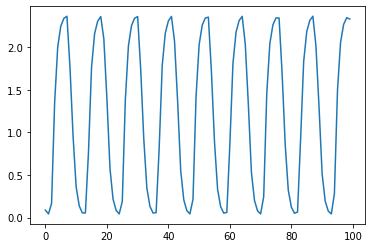

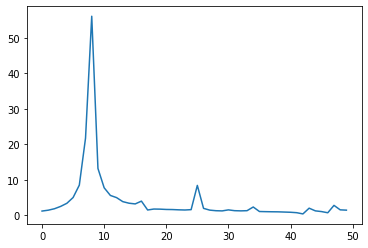

maximum frequency:  9


In [41]:
plt.plot(m.psi[-100:])
plt.show() 

y = np.copy(m.psi[-100:]).flatten() 
freq = np.fft.rfft(y)
plt.plot(np.abs(freq[1:]))
plt.show() 

print('maximum frequency: ', (np.abs(freq[1:]).argmax()+1))

In [9]:
n = 4
tau = 10
mu = 5/tau
nu = 5/tau
kappa = 1




T = 5e2
dt = 1e-2
sigma = 0
n_batches = int(T)


m = aging_model(mu, nu, kappa, n, tau)
m.initialise(T, dt, n_batches, sigma)
m.evolve() 

time taken:  2.148705005645752


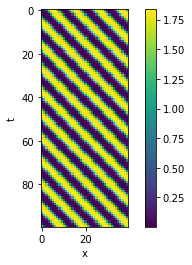

In [10]:
plt.imshow(m.psi[-100:, ::100])
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar() 
plt.show() 

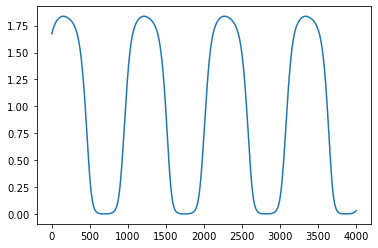

In [47]:
plt.plot(m.psi[-50])